In [1]:
import pickle

with open('dataframe.pkl', 'rb') as file:
    df = pickle.load(file)

## EDA Rapide

In [2]:
import matplotlib.pyplot as plt

In [3]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,27134
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,28058
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,28128
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607


In [4]:
import pandas as pd

table_frequence = df['FlagImpaye'].value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df = pd.DataFrame(table_frequence)

# Donnez un nom approprié à la colonne
table_frequence_df.columns = ['Fréquence']

table_frequence_df['Fréquence'] = table_frequence_df['Fréquence'] / table_frequence_df['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df)


   Fréquence
0   0.993545
1   0.006455


<AxesSubplot:title={'center':'Count (target)'}>

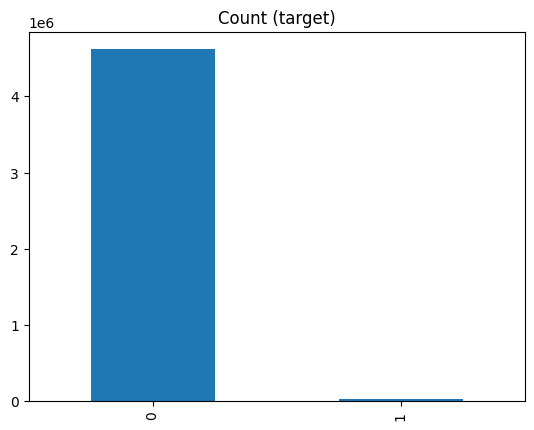

In [5]:
table_frequence.plot(kind='bar', title='Count (target)')

Les données sont fortements déséquilibrées pour la valeur cible 'FlagImpaye'

In [6]:
df.dtypes

ZIBZIN                              object
IDAvisAutorisationCheque            object
FlagImpaye                        category
Montant                            float64
DateTransaction             datetime64[ns]
CodeDecision                        object
VerifianceCPT1                       int64
VerifianceCPT2                       int64
VerifianceCPT3                       int64
D2CB                                 int64
ScoringFP1                         float64
ScoringFP2                         float64
ScoringFP3                         float64
TauxImpNb_RB                       float64
TauxImpNB_CPM                      float64
EcartNumCheq                         int64
NbrMagasin3J                         int64
DiffDateTr1                        float64
DiffDateTr2                        float64
DiffDateTr3                        float64
CA3TRetMtt                         float64
CA3TR                              float64
Heure                                int64
dtype: obje

### Je veux diminuer la taille du dataframe car il est bcp trop lourd. Je garde la même proportion de classe de 'FlagImpaye'

In [7]:
from sklearn.model_selection import train_test_split

# Séparez les données en fonction de la variable 'Flagimpaye'
df_pas_utilise, df_reduit = train_test_split(df, test_size=0.1, stratify=df['FlagImpaye'], random_state=42)

# Affichez la taille du sous-DataFrame de test pour vérifier
print("Taille du sous-DataFrame de test :", len(df_reduit))


Taille du sous-DataFrame de test : 464678


In [8]:
table_frequence = df_reduit['FlagImpaye'].value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df = pd.DataFrame(table_frequence)

# Donnez un nom approprié à la colonne
table_frequence_df.columns = ['Fréquence']

table_frequence_df['Fréquence'] = table_frequence_df['Fréquence'] / table_frequence_df['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df)

   Fréquence
0   0.993544
1   0.006456


### On définit la partie Train et Test

In [9]:
# Définition des dates limites pour les ensembles d'apprentissage et de test
train_inf = '2017-02-01'
train_sup = '2017-08-31'
test_inf = '2017-09-01'
test_sup = '2017-11-30'

In [10]:
train = df_reduit.loc[(df_reduit['DateTransaction'] >= train_inf) & (df_reduit['DateTransaction'] <= train_sup)]
X_train = train.drop(columns=['FlagImpaye'])
y_train = train['FlagImpaye']

In [18]:
test = df_reduit.loc[(df_reduit['DateTransaction'] >= test_inf) & (df_reduit['DateTransaction'] <= test_sup)]
X_test = test.drop(columns=['FlagImpaye','CodeDecision'])
y_test = test['FlagImpaye']

## On va tester des techniques d'over sampling

### Random Over-sampling

In [19]:
pip install imblearn

You are using pip version 10.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [22]:
table_frequence2 = y_train_ros.value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df2 = pd.DataFrame(table_frequence2)

# Donnez un nom approprié à la colonne
table_frequence_df2.columns = ['Fréquence']

table_frequence_df2['Fréquence'] = table_frequence_df2['Fréquence'] / table_frequence_df2['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df2)

   Fréquence
1        0.5
0        0.5


<AxesSubplot:title={'center':'Count (target)'}>

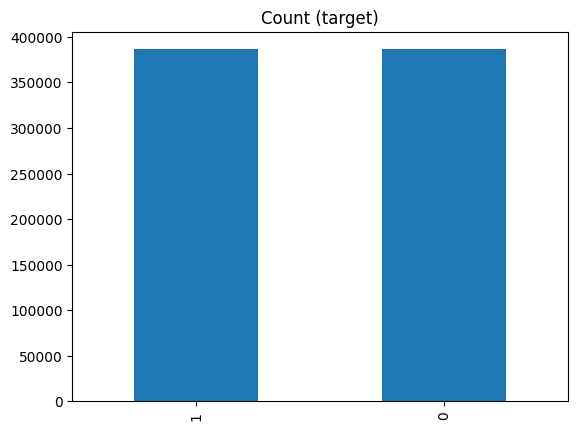

In [23]:
table_frequence2.plot(kind='bar', title='Count (target)')

## SMOTE-NC (Variables quanti et quali)

In [25]:
#On enlève la date pcq ça ne passe pas dans le smote. Peut être faut'il la laisser en type 'objet' finalement
X_train = X_train.drop(columns=['DateTransaction'])

KeyError: "['DateTransaction'] not found in axis"

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388491 entries, 1628857 to 3285815
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ZIBZIN                    388491 non-null  category
 1   IDAvisAutorisationCheque  388491 non-null  category
 2   Montant                   388491 non-null  float64 
 3   CodeDecision              388491 non-null  category
 4   VerifianceCPT1            388491 non-null  int64   
 5   VerifianceCPT2            388491 non-null  int64   
 6   VerifianceCPT3            388491 non-null  int64   
 7   D2CB                      388491 non-null  int64   
 8   ScoringFP1                388491 non-null  float64 
 9   ScoringFP2                388491 non-null  float64 
 10  ScoringFP3                388491 non-null  float64 
 11  TauxImpNb_RB              388491 non-null  float64 
 12  TauxImpNB_CPM             388491 non-null  float64 
 13  EcartNumCheq          

In [27]:
X_train['ZIBZIN'] = pd.Categorical(X_train['ZIBZIN'])
X_train['IDAvisAutorisationCheque'] = pd.Categorical(X_train['IDAvisAutorisationCheque'])
X_train['CodeDecision'] = pd.Categorical(X_train['CodeDecision'])

In [28]:
# Importation du package
from imblearn.over_sampling import SMOTENC

# Définition de l'instance SMOTE où 1 désigne la colonne catégorielle
smote = SMOTENC(categorical_features=[0,1,3])

# Application du SMOTE aux données
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

## ADASYN

In [62]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'A069010041908016160050038'